# Handling Imbalanced Data in Machine Learning

In many machine learning problems, we encounter situations where the target variable (the output we want to predict) is imbalanced. This means one class has significantly more instances than the other(s). For example, in a fraud detection problem, there might be many legitimate transactions and only a few fraudulent ones. Handling imbalanced data is crucial because the model may end up being biased towards the majority class and fail to recognize the minority class.

---

## Key Concepts:

### 1. What is Imbalanced Data?
   - Imbalanced data refers to situations where one class (category) in the target variable has many more samples than the other(s).
   - **Example**: In a binary classification problem, you might have 95% of the data belonging to class "0" (majority class) and only 5% belonging to class "1" (minority class).

### 2. Problems with Imbalanced Data
   - **Bias towards Majority Class**: Most machine learning algorithms tend to predict the majority class better because it has more data points.
   - **Poor Performance on Minority Class**: The model might miss important patterns in the minority class, which is often the class of interest (e.g., fraud detection, disease diagnosis).
   - **Metrics Mismatch**: Accuracy may not be a good metric when dealing with imbalanced data because a high accuracy might be achieved simply by predicting the majority class all the time.

---

## Techniques to Handle Imbalanced Data

### 1. Resampling Methods:
   - **Oversampling the Minority Class**: This technique involves duplicating instances from the minority class to balance the data.
   - **Undersampling the Majority Class**: This technique involves randomly removing instances from the majority class to balance the data.
   
   **Example**:
   - If you have a dataset with 1000 samples (950 from the majority class and 50 from the minority class), you can either:
     - **Oversample** the minority class to have 950 samples, or
     - **Undersample** the majority class to have 50 samples.

### 2. Synthetic Data Generation:
   - **SMOTE (Synthetic Minority Over-sampling Technique)**: Instead of duplicating minority class samples, SMOTE creates synthetic examples that are similar to the existing minority class samples. This helps improve model generalization.
   - **Example**: SMOTE generates synthetic data points by creating new instances that lie between existing minority class samples.

### 3. Using Class Weights:
   - Many algorithms, like Logistic Regression, Random Forest, or Support Vector Machines, allow you to assign different weights to classes during training.
   - **Higher weight for minority class**: This penalizes misclassifying minority class samples more than the majority class, forcing the model to pay more attention to the minority class.
   
   **Example**:
   - If you use `class_weight='balanced'` in Scikit-learn, it automatically adjusts the weight inversely proportional to class frequencies in the dataset.

### 4. Anomaly Detection:
   - If the minority class is extremely rare (e.g., fraud detection), you might treat it as an anomaly detection problem rather than a regular classification task.
   - Specialized models, like One-Class SVM, are designed for this kind of problem.

---

## Metrics for Imbalanced Data:
   - **Accuracy** is often misleading for imbalanced data.
   - **Precision**: Focuses on the proportion of true positive predictions out of all predicted positive instances.
   - **Recall (Sensitivity)**: Focuses on the proportion of true positive predictions out of all actual positive instances.
   - **F1-Score**: The harmonic mean of precision and recall. A good metric for imbalanced data.

---


## Basic Coding Example: Handling Imbalanced Data with SMOTE

Here is an example using Python to handle imbalanced data using **SMOTE** and **Logistic Regression**:



Class distribution before SMOTE: [950  50]


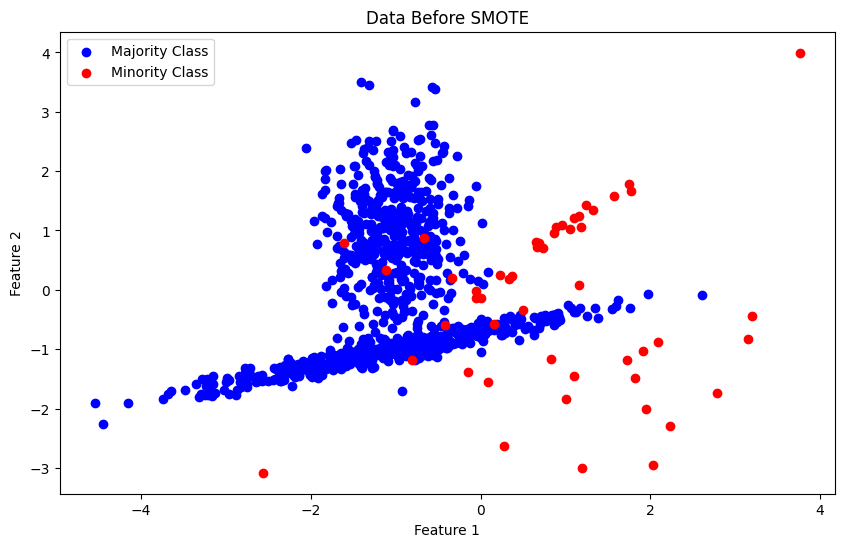

Class distribution after SMOTE: [950 950]


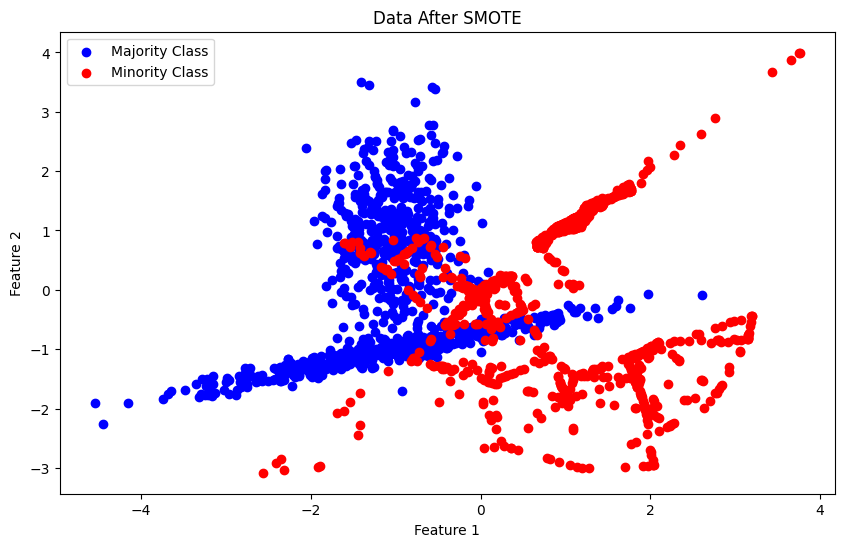

In [3]:
# Import necessary libraries
# %pip install imblearn
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Creating a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=2, weights=[0.95, 0.05], flip_y=0, random_state=42)

# Before applying SMOTE, let's check the class distribution
print("Class distribution before SMOTE:", np.bincount(y))

# Plot the data before applying SMOTE
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],
            color='blue', label='Majority Class')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],
            color='red', label='Minority Class')
plt.title('Data Before SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Apply SMOTE (oversampling the minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# After applying SMOTE, check the class distribution
print("Class distribution after SMOTE:", np.bincount(y_resampled))

# Plot the data after applying SMOTE
plt.figure(figsize=(10, 6))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0]
            [:, 1], color='blue', label='Majority Class')
plt.scatter(X_resampled[y_resampled == 1][:, 0],
            X_resampled[y_resampled == 1][:, 1], color='red', label='Minority Class')
plt.title('Data After SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Questions Related to Handling Imbalanced Data

1. **What is imbalanced data, and why is it a problem in machine learning?**
   - **Expected Answer**: Imbalanced data refers to datasets where one class has significantly more instances than the other. This can lead to biased models that favor the majority class, often ignoring the minority class, which could be the class of interest (e.g., fraud detection, disease diagnosis).

2. **What are some common techniques to handle imbalanced data?**
   - **Expected Answer**: Common techniques include:
     - **Resampling** (oversampling the minority class or undersampling the majority class)
     - **SMOTE** (Synthetic Minority Over-sampling Technique)
     - **Class weights** (assigning higher weights to the minority class)
     - **Anomaly detection** methods for extremely rare cases.

3. **What is SMOTE, and how does it help with imbalanced data?**
   - **Expected Answer**: SMOTE is a technique where synthetic data points are created in the feature space by interpolating between existing minority class samples. This helps in balancing the data while preventing overfitting that can happen with simple oversampling.

4. **What is the difference between precision and recall?**
   - **Expected Answer**: 
     - **Precision** measures how many of the predicted positive instances are actually positive.
     - **Recall** measures how many of the actual positive instances are correctly predicted.

5. **How does using class weights help in dealing with imbalanced data?**
   - **Expected Answer**: By assigning higher weights to the minority class, the model is penalized more for misclassifying minority class instances, encouraging it to focus more on these instances.

---
